# Acerca Del Conjunto De Datos

## Descripción:

El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y les facilita la modificación de productos según las necesidades, comportamientos e inquietudes específicas de los diferentes tipos de clientes. En este artículo, les presentaré un proyecto de ciencia de datos sobre el análisis de la personalidad del cliente con Python.

## ¿Por Qué Es Interesante Este Conjunto De Datos?

El análisis de la personalidad de los clientes ayuda a una empresa a modificar su producto en función de sus clientes objetivo de distintos tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero para comercializar un nuevo producto a todos los clientes de la base de datos de la empresa, una empresa puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y luego comercializarlo solo en ese segmento en particular.

## Algunas De Las Preguntas De Ejemplo Que Se Pueden Responder Usando Esto:

- Lo que la gente dice sobre su producto: qué determina la actitud de los clientes hacia el producto.
- Lo que hace la gente: revela lo que la gente hace en lugar de lo que dice sobre su producto.

In [1]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
import utils_profe
from IPython.display import HTML, Image
from tabulate import tabulate

In [2]:
def ver_diccionario(diccionario_file):
    # Carga del diccionario de datos desde el archivo CSV
    # Asegúrate de reemplazar 'diccionario.csv' por el nombre de tu archivo
    diccionario = pd.read_csv(f'../data/{diccionario_file}')

    # Mostrar los datos tabulados con `tabulate`
    tabla = tabulate(diccionario, headers='keys', tablefmt='fancy_grid', showindex=False)

    # Imprimir la tabla
    print(tabla)

In [3]:
def ver_dic2df(diccionario_file):
    # Carga del diccionario de datos desde el archivo CSV
    # Asegúrate de reemplazar 'diccionario.csv' por el nombre de tu archivo
    diccionario = pd.read_csv(f'../data/{diccionario_file}')
    diccionario.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', 'gray'), ('color', 'white')]}]
    )
    return diccionario


In [4]:
# Leer el archivo
path = '../data/dataset2.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= '\t', header=0)
print(df.shape)
df.info()

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [5]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [6]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [7]:
# Convertir a primitivas todas las columnas del dataframe
utils_profe.generar_diccionario(df)

data_dict = {
    'ID': 'int64',
    'Year_Birth': 'int64',
    'Education': 'object',
    'Marital_Status': 'object',
    'Income': 'float64',
    'Kidhome': 'int64',
    'Teenhome': 'int64',
    'Dt_Customer': 'object',
    'Recency': 'int64',
    'MntWines': 'int64',
    'MntFruits': 'int64',
    'MntMeatProducts': 'int64',
    'MntFishProducts': 'int64',
    'MntSweetProducts': 'int64',
    'MntGoldProds': 'int64',
    'NumDealsPurchases': 'int64',
    'NumWebPurchases': 'int64',
    'NumCatalogPurchases': 'int64',
    'NumStorePurchases': 'int64',
    'NumWebVisitsMonth': 'int64',
    'AcceptedCmp3': 'int64',
    'AcceptedCmp4': 'int64',
    'AcceptedCmp5': 'int64',
    'AcceptedCmp1': 'int64',
    'AcceptedCmp2': 'int64',
    'Complain': 'int64',
    'Z_CostContact': 'int64',
    'Z_Revenue': 'int64',
    'Response': 'int64',
}


In [8]:
# Iterar por columnas de tipo object y aplicar value_counts
for col in df.select_dtypes(include=['object']):
    print(f"Value counts para la columna '{col}':")
    print(df[col].value_counts())
    print("\n")

Value counts para la columna 'Education':
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Value counts para la columna 'Marital_Status':
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Value counts para la columna 'Dt_Customer':
Dt_Customer
31-08-2012    12
14-02-2013    11
12-09-2012    11
12-05-2014    11
20-08-2013    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 663, dtype: int64




In [9]:
# Asumiendo que 'Dt_Customer' ya está en formato de cadena 'día-mes-año'
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
data_dict = {
    'ID': 'int64',
    'Year_Birth': 'int64',
    'Education': 'category',
    'Marital_Status': 'category',
    'Income': 'float64',
    'Kidhome': 'int64',
    'Teenhome': 'int64',
    'Dt_Customer': 'datetime64[ns]',
    'Recency': 'int64',
    'MntWines': 'int64',
    'MntFruits': 'int64',
    'MntMeatProducts': 'int64',
    'MntFishProducts': 'int64',
    'MntSweetProducts': 'int64',
    'MntGoldProds': 'int64',
    'NumDealsPurchases': 'int64',
    'NumWebPurchases': 'int64',
    'NumCatalogPurchases': 'int64',
    'NumStorePurchases': 'int64',
    'NumWebVisitsMonth': 'int64',
    'AcceptedCmp3': 'category',
    'AcceptedCmp4': 'category',
    'AcceptedCmp5': 'category',
    'AcceptedCmp1': 'category',
    'AcceptedCmp2': 'category',
    'Complain': 'category',
    'Z_CostContact': 'int64',
    'Z_Revenue': 'int64',
    'Response': 'category'
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [10]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)

In [11]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4,5,6,7
Education,Graduation,PhD,Master,Basic,2n Cycle,None,None,None
Marital_Status,Single,Together,Married,Divorced,Widow,Alone,Absurd,YOLO
AcceptedCmp3,0,1,None,None,None,None,None,None
AcceptedCmp4,0,1,None,None,None,None,None,None
AcceptedCmp5,0,1,None,None,None,None,None,None
AcceptedCmp1,0,1,None,None,None,None,None,None
AcceptedCmp2,0,1,None,None,None,None,None,None
Complain,0,1,None,None,None,None,None,None
Response,1,0,None,None,None,None,None,None


In [12]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
df[df['Marital_Status'].isin(['YOLO', 'Absurd'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


In [14]:
df['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: category
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']

In [15]:
# Cambiar las categorías, renombrando 'YOLO' a 'Married'
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Married')
# Cambiar las categorías, renombrando 'Absurde' a 'Married'
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Married')


C:\Users\edgar\AppData\Local\Temp\ipykernel_17764\4255549447.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Married')
C:\Users\edgar\AppData\Local\Temp\ipykernel_17764\4255549447.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Married')


### **Manejo de valores faltantes:**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [16]:
print(utils_profe.calculate_na_statistics(df))

                     datos sin NAs en q  Na en q  Na en %
Income                             2216       24     1.07
ID                                 2240        0     0.00
Year_Birth                         2240        0     0.00
Education                          2240        0     0.00
Marital_Status                     2240        0     0.00
Kidhome                            2240        0     0.00
Teenhome                           2240        0     0.00
Dt_Customer                        2240        0     0.00
Recency                            2240        0     0.00
MntWines                           2240        0     0.00
MntFruits                          2240        0     0.00
MntMeatProducts                    2240        0     0.00
MntFishProducts                    2240        0     0.00
MntSweetProducts                   2240        0     0.00
MntGoldProds                       2240        0     0.00
NumDealsPurchases                  2240        0     0.00
NumWebPurchase

In [17]:
# Calcular la moda
moda = df['Income'].describe()
moda


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [18]:
df['Income'].fillna(52247.25, inplace=True)


C:\Users\edgar\AppData\Local\Temp\ipykernel_17764\3620287967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(52247.25, inplace=True)


### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [19]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils_profe.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
ID,0.0,0.000000,0.0,11191.0
Year_Birth,3.0,0.133929,1940.0,1996.0
Income,8.0,0.357143,1730.0,113734.0
Kidhome,0.0,0.000000,0.0,2.0
Teenhome,0.0,0.000000,0.0,2.0
Recency,0.0,0.000000,0.0,99.0
MntWines,35.0,1.562500,0.0,1224.0
MntFruits,227.0,10.133929,0.0,81.0
MntMeatProducts,175.0,7.812500,0.0,555.0
MntFishProducts,223.0,9.955357,0.0,120.0


In [22]:
utils_profe.identificar_atipicos_IQR(df, ['Year_Birth'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


In [24]:
df['Year_Birth'].mode()

0    1976
Name: Year_Birth, dtype: int64

In [29]:
# Asignar el valor 1976 a todas las filas donde Year_Birth sea menor a 1901
df.loc[df['Year_Birth'] < 1901, 'Year_Birth'] = 1976

In [30]:
# Ordenar el DataFrame por 'Income' de forma ascendente y obtener los 5 primeros registros
df_sorted = df.sort_values(by='Year_Birth').head(5)

# Mostrar los resultados
df_sorted.T

,1950,424,415,894,2084
ID,6663,6932,7106,8800,5250
Year_Birth,1940,1941,1943,1943,1943
Education,PhD,PhD,PhD,PhD,Master
Marital_Status,Single,Married,Married,Divorced,Widow
Income,51141.0,93027.0,75865.0,48948.0,52247.25
Kidhome,0,0,0,0,0
Teenhome,0,0,0,0,0
Dt_Customer,2013-07-08 00:00:00,2013-04-13 00:00:00,2014-03-31 00:00:00,2013-02-01 00:00:00,2013-10-30 00:00:00
Recency,96,77,73,53,75
MntWines,144,1285,483,437,532


# Me llama la atención los que ganan entre 1730 dolares a 4500 usd al año y tienen familia.

Encontre varios, y seria bueno consultar con los dueños de los datos.

In [ ]:
df['Income'].min()

np.float64(1730.0)

In [ ]:
# Ordenar el DataFrame por 'Income' de forma ascendente y obtener los 5 primeros registros
df_sorted = df.sort_values(by='Income').head(5)

# Mostrar los resultados
df_sorted.T


,1245,21,1524,1846,1975
ID,6862,5376,11110,9931,10311
Year_Birth,1971,1979,1973,1963,1969
Education,Graduation,Graduation,Graduation,PhD,Graduation
Marital_Status,Divorced,Married,Single,Married,Married
Income,1730.0,2447.0,3502.0,4023.0,4428.0
Kidhome,0,1,1,1,0
Teenhome,0,0,0,1,1
Dt_Customer,2014-05-18 00:00:00,2013-01-06 00:00:00,2013-04-13 00:00:00,2014-06-23 00:00:00,2013-10-05 00:00:00
Recency,65,42,56,29,0
MntWines,1,1,2,5,16


In [ ]:
ver_diccionario('diccionario2.csv')

╒═════════════════════╤═══════════╤════════════════════════════════════════════════════════════════════════════════════════════╕
│ ID                  │ Integer   │ Identificador único del cliente                                                            │
╞═════════════════════╪═══════════╪════════════════════════════════════════════════════════════════════════════════════════════╡
│ Year_Birth          │ Integer   │ Año de nacimiento del cliente                                                              │
├─────────────────────┼───────────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│ Education           │ category  │ Educación Cualificación del cliente                                                        │
├─────────────────────┼───────────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│ Marital_Status      │ category  │ Estado civil del cliente                                     

#### Visualización 1

**Hipótesis extraída**

* La mayoría de los clientes son universitarios.
  
* La mayoría son casados.

* Los que tienen adolecentes compran mas que los que tienen hijos.

**Análisis descriptivo que la justifica**

* Como podemos ver en los histogramas, la distribución de las compras en el mes, la gran mayoría de los clientes vienen una vez y ya no regresan.
    

* Las promociones no son efectivas.

* El cliente no señala el motivo que le molesto. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
numerical_columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')

In [34]:
numerical_columns = ['Year_Birth','Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebVisitsMonth','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
       ]
# Mostrar estadísticas descriptivas de las columnas numéricas
print(df[numerical_columns].describe())



        Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean   1968.911161   52247.251339     0.444196     0.506250    49.109375   
std      11.696957   25037.797168     0.538398     0.544538    28.962453   
min    1940.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35538.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51741.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68289.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000        

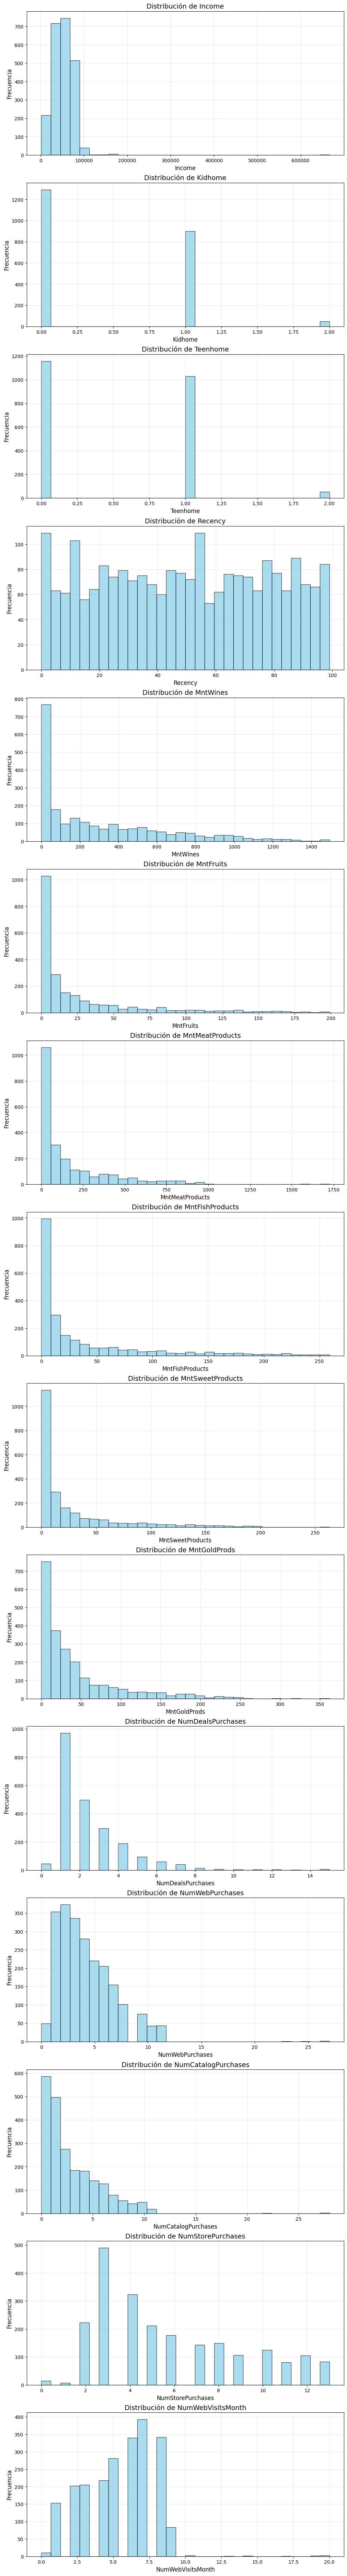

In [ ]:
# Configurar el tamaño de la figura y diseño
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5 * num_cols), constrained_layout=True)

# Iterar y crear un histograma para cada columna numérica
for ax, column in zip(axes, numerical_columns):
    ax.hist(df[column].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    ax.set_title(f'Distribución de {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.grid(alpha=0.3)

# Mostrar la figura
plt.show()


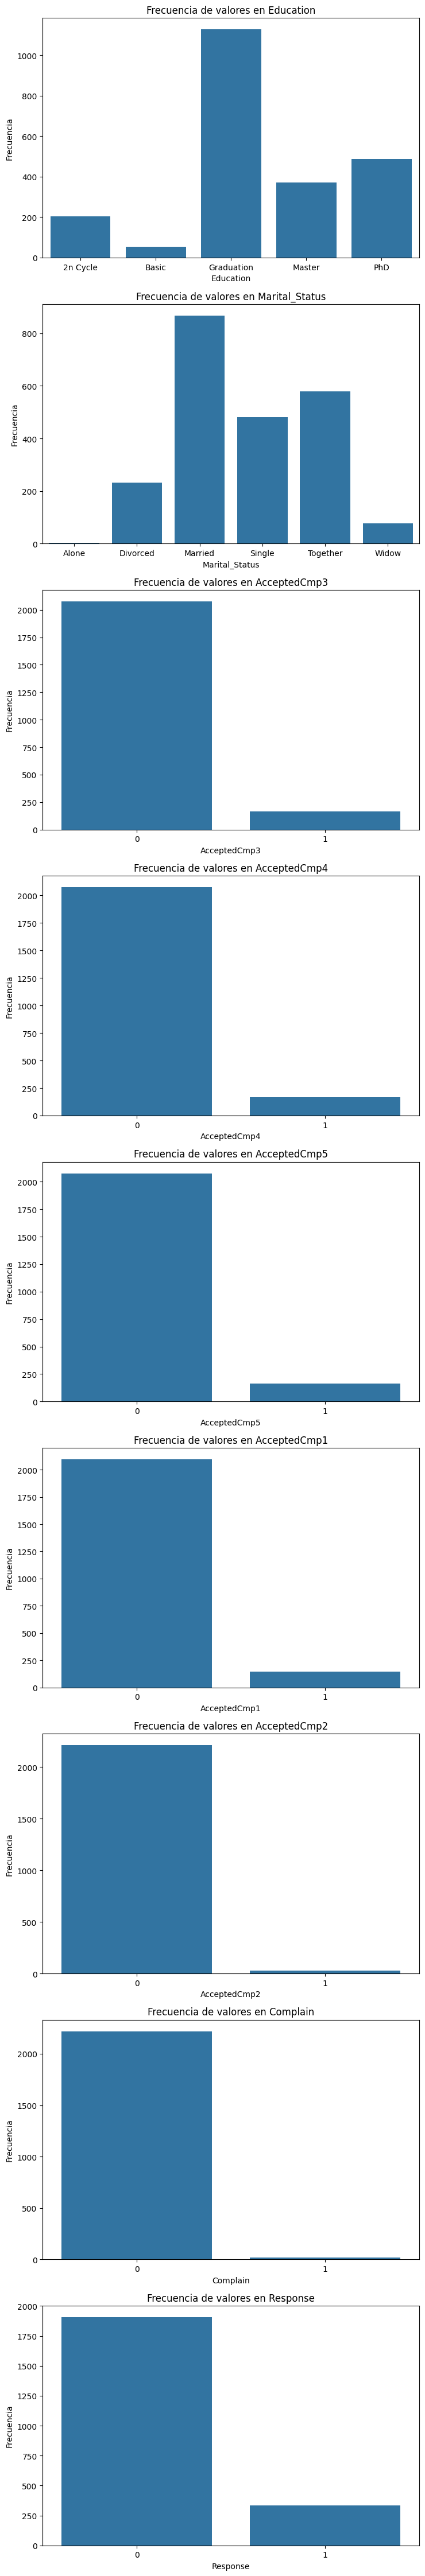

In [33]:
# Identificar columnas booleanas
boolean_columns = df.select_dtypes('category').columns
# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(boolean_columns)))
# Crear un gráfico de conteo para cada columna booleana
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(len(boolean_columns), 1, i)
    sns.countplot(x=df[column])
    plt.title(f'Frecuencia de valores en {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Este ejercicio da para entrar mas porque es necesario analizar para obtener nuevas características para poder responder estos puntos:
- Lo que la gente dice sobre su producto: qué determina la actitud de los clientes hacia el producto.
- Lo que hace la gente: revela lo que la gente hace en lugar de lo que dice sobre su producto.

Este dataset tiene resuelto el EDA de una manera diferente a lo que hacemos nosotros, pero ya elegí el de cambio de carrera.